# Geely Auto Assignment

### Name: Tushar Sharma
### Reg No.: 12018293
### Roll No: RK20SSA16

In [105]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# This library will be required for label encodings for car company name
from sklearn.preprocessing import LabelEncoder

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
def plotHeatMap(data):
    plt.figure(figsize = (20, 26))
    plt.subplot(2, 1, 1)
    sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
    plt.show()

### Data Import & Preparation

In [15]:
# Import the data - read the csv file and view the data.

cars_df = pd.read_csv("CarPrice_Assignment.csv")
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670


In [16]:
# dropping column car-ID as it is of no use for our prediction
cars_df.drop(labels = ['car_ID'], axis = 1, inplace = True)

#### Exploring the cars dataframe

In [17]:
cars_df.shape

(205, 25)

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

As part of the requirement for the prediction we need to consider only the company name - There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

In [19]:
# Extract the 'company name' and the 'car model' from the 'CarName' column & create new column for the same.
cars_df['CompanyName'] = cars_df['CarName'].str.split().str[0]

cars_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000,audi
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000,audi
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000,audi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000,audi
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670,audi


In [20]:
# Rearranging the columns list in the dataframe to have the two new columns in 'Company Name' & 'Car Model' appear in 
cols = cars_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

# Assigning the re-arranged columns to our 'cars_df'
cars_df = cars_df[cols]
cars_df

,CompanyName,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,alfa-romero,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,alfa-romero,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,audi,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
5,audi,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000
6,audi,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000
7,audi,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000
8,audi,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000
9,audi,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670


In [21]:
# As we have extracted the Comapny Name from CarName, we would not need the car name columns for further analysis.
# Lets drop the variable.

cars_df.drop('CarName', axis = 1, inplace = True)

cars_df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,audi,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,audi,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [22]:
# Now lets see the values in the 'Company Name' column 

cars_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we see above there are company names which are same but with different spellings and some with abbreviations. Taking the values from the above list , lets create the corrected list and replace these values.

alfa-romero - Alfa Romeo

maxda - Mazda

nissan - Nissan

porcshce - Porsche

toyouta - Toyota

vokswagen - Volkswagen

vw - Volkswagen

In [24]:
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['Nissan'], 'nissan')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['porcshce'], 'porsche')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['toyouta'], 'toyota')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

#Now lets look into the unique values in 'Comapny Name' again-
cars_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [25]:
cars_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


### Exploratory Data Analysis & Data Visualization

In [26]:
# Lets have a look at the price column

cars_df.price.describe()

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64

As we see from the above observation mean is greater than median (data is right skewed), we will go for median as our measure for central tendency whenever required.

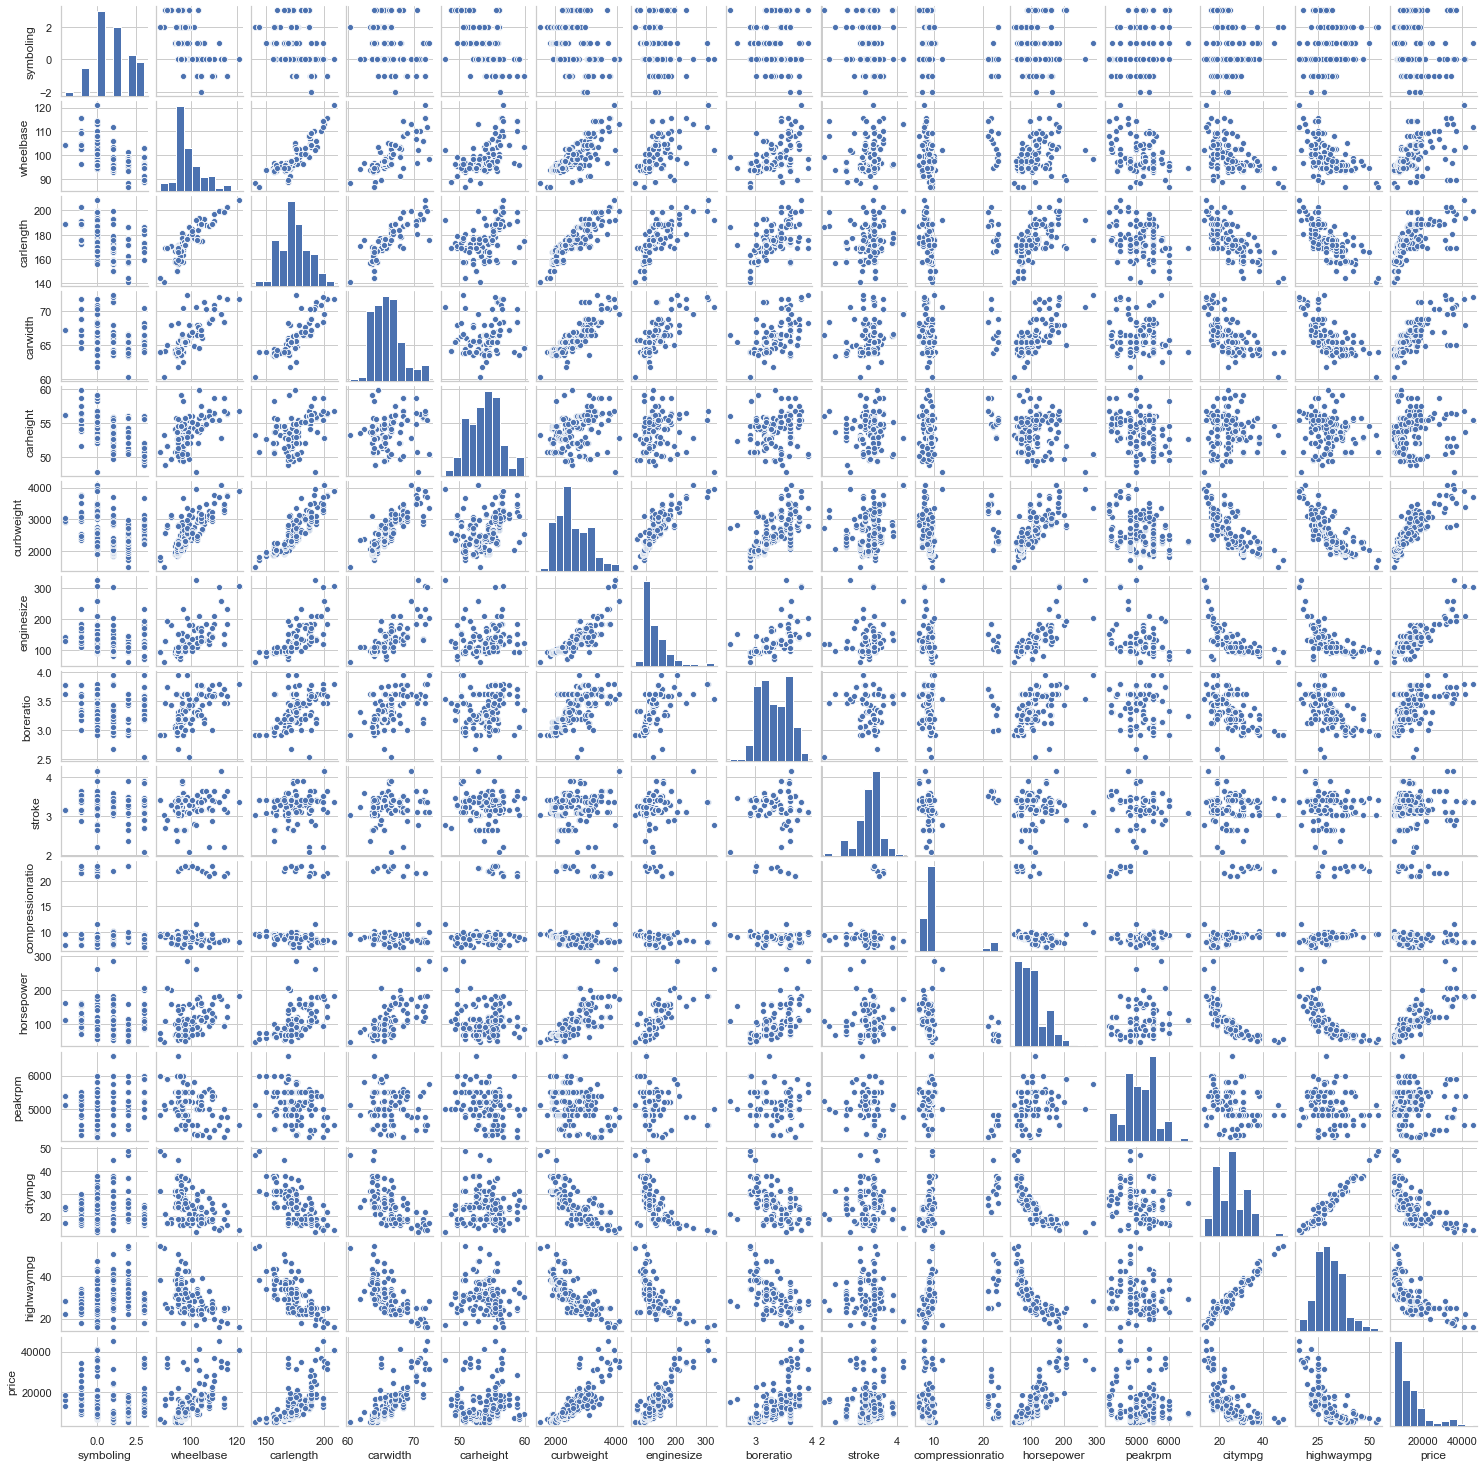

In [30]:
# Pair plot for the numeric variables showing how they fair against each other.

pairplot = sns.pairplot(cars_df)
pairplot.fig.set_size_inches(20,20)
plt.show()

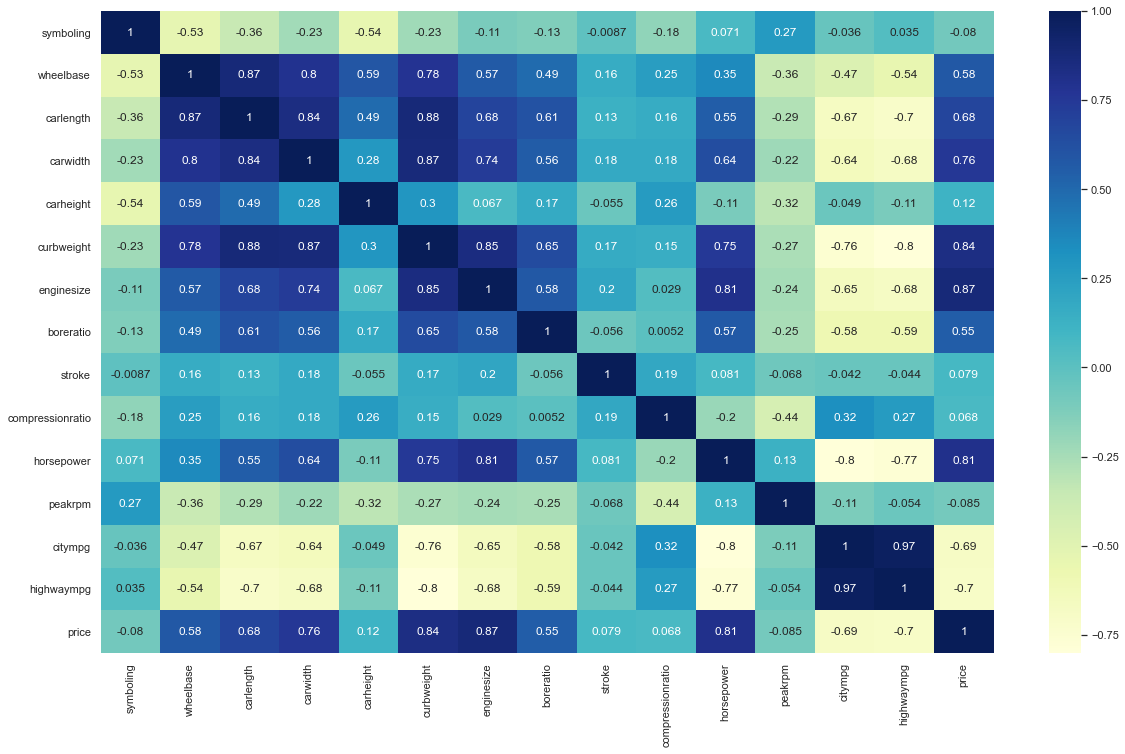

In [31]:
# Lets see the correlation plot among the numeric variables showing how strongly they are related 
# to each other and to 'price'.

plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(cars_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above correlation plot we see that there are some variables that are highly correlated while some have negative correlation values.

As we are predicting the price here, lets see how price correlates with the other variables - From the above plot we observe that

1. price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
2. price has a very low correlation with carheight, stroke and compressionratio.
3. price shows a decent correlation with wheelbase, carlength, boreratio.
4. price is highly correlated to carwidth, crubweight, enginesize and horsepower.

CompanyName
jaguar       35550.0000
buick        32892.0000
porsche      32528.0000
bmw          22835.0000
volvo        18420.0000
audi         17710.0000
peugeot      16630.0000
mercury      16503.0000
alfa-romeo   16500.0000
saab         15275.0000
mazda        10595.0000
volkswagen    9737.5000
renault       9595.0000
toyota        9103.0000
isuzu         8916.5000
mitsubishi    8499.0000
nissan        8124.0000
subaru        7894.0000
dodge         7609.0000
plymouth      7609.0000
honda         7295.0000
chevrolet     6295.0000
Name: price, dtype: float64


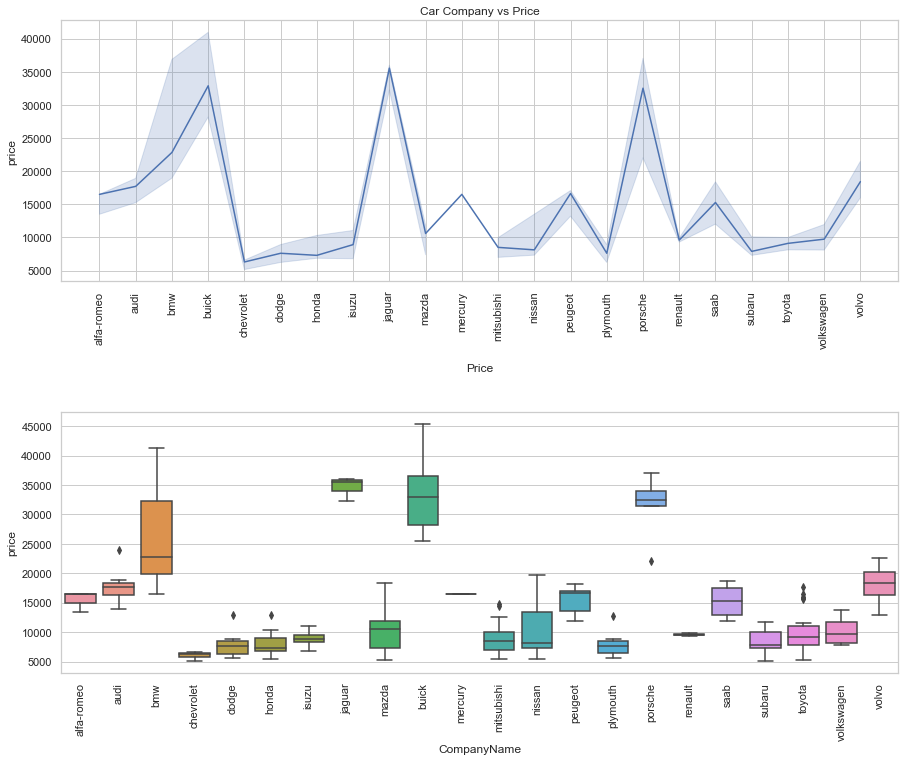

In [33]:
# Lets have a look at the Company Name vs Price distribution

print(cars_df.groupby(by='CompanyName').price.median().sort_values(ascending=False))


plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x='CompanyName', y='price', data=cars_df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 15)
plt.xlabel('Price', labelpad = 15)

plt.subplot(2, 1, 2)
sns.boxplot(x='CompanyName', y='price', data=cars_df)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

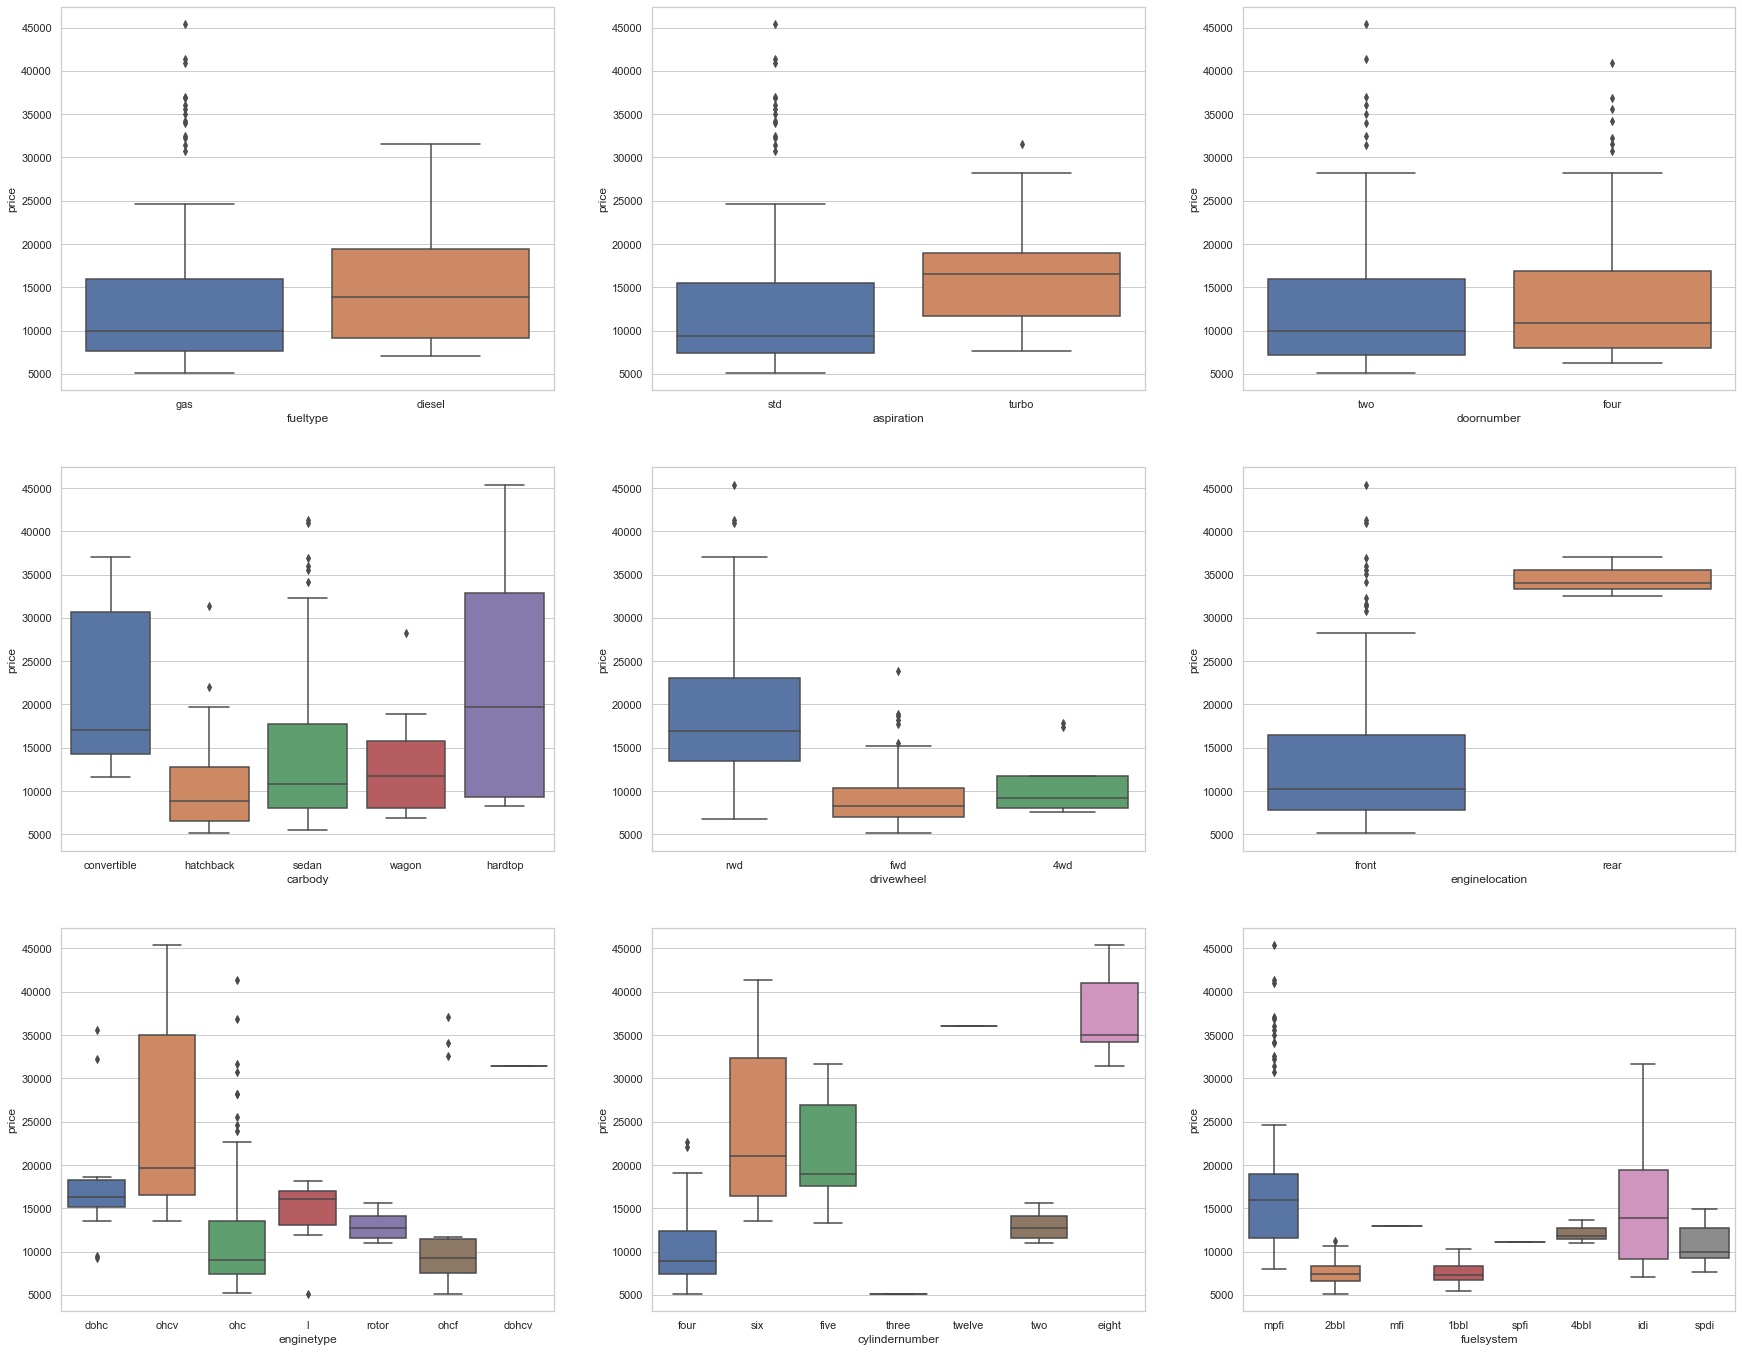

In [34]:
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = cars_df)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = cars_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)

plt.show()

#### Data Preparation

In [35]:
# unique values for fueltype
print("Unique values in fueltype")
print(cars_df['fueltype'].unique())

print('\n')

# unique values for aspiration
print("Unique values in aspiration")
print(cars_df['aspiration'].unique())

print('\n')

# unique values for doornumber
print("Unique values in doornumber")
print(cars_df['doornumber'].unique())

print('\n')

# unique values for carbody
print("Unique values in carbody")
print(cars_df['carbody'].unique())

print('\n')

# unique values for drivewheel
print("Unique values in drivewheel")
print(cars_df['drivewheel'].unique())

print('\n')

# unique values for enginelocation
print("Unique values in enginelocation")
print(cars_df['enginelocation'].unique())

print('\n')

# unique values for enginetype
print("Unique values in enginetype")
print(cars_df['enginetype'].unique())

print('\n')

# unique values for cylindernumber
print("Unique values in cylindernumber")
print(cars_df['cylindernumber'].unique())

print('\n')

# unique values for fuelsystem
print("Unique values in fuelsystem")
print(cars_df['fuelsystem'].unique())

Unique values in fueltype
['gas' 'diesel']


Unique values in aspiration
['std' 'turbo']


Unique values in doornumber
['two' 'four']


Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel
['rwd' 'fwd' '4wd']


Unique values in enginelocation
['front' 'rear']


Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


As we see from the output above variables -

1. [fueltype, aspiration, doornumber, enginelocation] ---- 2 levels
2. [drivewheel] ---- 3 levels
3. [carbody] ---- 5 levels
4. [enginetype, cylindernumber] ---- 7 levels
5. [fuelsystem] ---- 8 levels

In [36]:
# We will map the variable with 2 levels to binary encodings of 0 & 1 - 'fueltype', 'aspiration', 'doornumber', 'enginelocation'

cars_df['fueltype'] = cars_df['fueltype'].map({'diesel':0, 'gas':1})
cars_df['aspiration'] = cars_df['aspiration'].map({'turbo':0, 'std':1})
cars_df['doornumber'] = cars_df['doornumber'].map({'two':0, 'four':1})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'rear':0, 'front':1})


# Assigning dummy variables to ['drivewheel', 'carbody','enginetype', 'cylindernumber', 'fuelsystem'] columns

cars_df = pd.get_dummies(cars_df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
cars_df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,alfa-romeo,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,alfa-romeo,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,alfa-romeo,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,audi,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,audi,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Now as we did not use the default drop_first option in get_dummies above,
# lets go ahead and drop that dummy variabe which is leat related to price

# for carbody variable, from EDA - the category hatchback seems to be the least related to price.
# Lets go ahead and drop it

cars_df.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)

# for fuelsystem variable, from EDA - the category '1bbl' seems to be the least related to price.
# Lets go ahead and drop it
cars_df.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)

# the reason we are dropping 'drivewheel_4wd' from the drive wheel category 
# (though it looks like it is the most common preffered) is that it has a reducing effect on the price.
cars_df.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)

# engine type rotor category has the least effect on the price. Lets drop it.
cars_df.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)

# cylindernumber_three category has the least effect on the price. Lets drop it.
cars_df.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)

# Now lets again look at the shape of the dataset and the number of variables we have - 
print(cars_df.columns)
print(cars_df.shape)

Index(['CompanyName', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
(205, 45)


In [38]:
# Unique values in the 'Company Name' column 

cars_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [39]:
# Lets have a look at certain range distributions for car price

cars_df.price.describe([.40, .80])

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
40%      9036.6000
50%     10295.0000
80%     17493.8000
max     45400.0000
Name: price, dtype: float64

In [40]:
cars_df_category = cars_df.groupby(['CompanyName']).median()
cars_df_category['price']

CompanyName
alfa-romeo   16500.0000
audi         17710.0000
bmw          22835.0000
buick        32892.0000
chevrolet     6295.0000
dodge         7609.0000
honda         7295.0000
isuzu         8916.5000
jaguar       35550.0000
mazda        10595.0000
mercury      16503.0000
mitsubishi    8499.0000
nissan        8124.0000
peugeot      16630.0000
plymouth      7609.0000
porsche      32528.0000
renault       9595.0000
saab         15275.0000
subaru        7894.0000
toyota        9103.0000
volkswagen    9737.5000
volvo        18420.0000
Name: price, dtype: float64

In [41]:
CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
bins = [0, 10000, 20000, 50000]

cars_df_category = cars_df_category[['price']].join(pd.get_dummies(pd.cut(cars_df_category.price, bins, labels=CarLabels)))
cars_df_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romeo,16500.0000,0,1,0
audi,17710.0000,0,1,0
bmw,22835.0000,0,0,1
buick,32892.0000,0,0,1
chevrolet,6295.0000,1,0,0
dodge,7609.0000,1,0,0
honda,7295.0000,1,0,0
isuzu,8916.5000,1,0,0
jaguar,35550.0000,0,0,1


In [44]:
# From the above grouping we have divided our car companies into 'EconomicCars', 'MidTierCars', 'LuxuryCars' categories.
# Lets integrate these categories into our main dataframe.

# Initially lets default the values to 0. We will only deal with 2 columns.

luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']


def mapCarCompanyToLuxuryCategory(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)


cars_df['LuxuryCars'] = 0
cars_df['LuxuryCars'] = cars_df['CompanyName'].apply(mapCarCompanyToLuxuryCategory) 

In [43]:
midTierCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def mapCarCompanyToMidTierCategory(carCompanies1):
    retval = 0
    if carCompanies1 in midTierCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

cars_df['MidTierCars'] = 0
cars_df['MidTierCars'] = cars_df['CompanyName'].apply(mapCarCompanyToMidTierCategory) 

# Lets look at the dataframe again
cars_df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,alfa-romeo,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,alfa-romeo,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,alfa-romeo,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,audi,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,audi,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
# Now as we have categorized the car companies into Economic, MidTies and Luxury cars,
# we can safely drop the 'CompanyName' column.

cars_df.drop(labels=['CompanyName'], axis = 1, inplace=True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [46]:
# Dealing with the 'Symboling' variable -
# From the data dictionary we know - Its assigned insurance risk rating, A value of +3 indicates 
# that the auto is risky, -3 that it is probably prety safe.
# So this can be categorized into 3 categories such as - 'HighRisk' - (-3, -2), 'ModerateRisk' - (-1, 0, 1), 'LowRisk' - (2, 3)

SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]

cars_df = cars_df.join(pd.get_dummies(pd.cut(cars_df['symboling'], bins, labels=SymbolingLabels)))
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk,HighRisk
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [47]:
# Now we can safely drop one of the risk based dummy variables created above. We will go ahead and drop the 'HighRisk'
# variable.

cars_df.drop(labels=['HighRisk'], axis = 1, inplace = True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [48]:
# Now as we have categorized symboling into LowRisk, HighRisk and ModerateRisk categories, 
# we can safely drop the symboling column.

cars_df.drop(labels=['symboling'], axis = 1, inplace = True)
cars_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [50]:
cars_df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
cars_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


### Building the linear model

In [52]:
# Purpose     :    Applies stats model to the given data & returns the built 'linear_model'.
# Parameters  :    data - the dataset on which the linear model has to be built on.
# Returns     :    linear_model - the model that has been built on the data provided.


def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model


In [53]:
# Purpose     :    Calculates the Variance inflation factor for the given data on which stats model has been applied.
# Parameters  :    data - the dataset for which the VIF values have to be calculated.
# Returns     :    vif - the vif values for the variables on the model's data.
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# We will divide the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
#  Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# 'wheelbase' 'carheight' 'curbweight' 'enginesize' 'boreratio' 'stroke' 'compressionratio' 
# 'horsepower' 'peakrpm' 'curbweight' 'price'

scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
y_train = df_train.pop('price')
X_train = df_train

In [57]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 9),
 ('aspiration', False, 11),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 19),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 26),
 ('enginetype_dohc', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 22),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', Fal

In [59]:
# Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuryCars'],
      dtype='object')

In [60]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'peakrpm',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'MidTierCars', 'LowRisk',
       'ModerateRisk'],
      dtype='object')

#### Model 1

In [61]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.95e-67
Time:                        17:58:24   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [62]:
# Calculate the VIFs again for the new model
vif_val_1 = calculateVIF(X_train_1)

# Let's see the vif values
vif_val_1

,Features,VIF
2,curbweight,70.7500
3,enginesize,66.6300
0,enginelocation,41.8200
5,stroke,30.2000
7,horsepower,26.7700
1,wheelbase,25.9800
4,boreratio,25.9200
11,cylindernumber_four,11.3800
12,cylindernumber_six,5.9700
13,cylindernumber_twelve,4.2400


Looking at the statistics of model 1, we observe that variable - cylindernumber_eight has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 2

In [65]:
X_train_2 = X_train_1.drop(["cylindernumber_eight"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the new linear model
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.73e-68
Time:                        17:59:58   Log-Likelihood:                 210.35
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [66]:
# Calculate the VIFs again for the new model
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

,Features,VIF
2,curbweight,70.3000
3,enginesize,44.7300
0,enginelocation,35.1200
7,horsepower,26.7500
1,wheelbase,25.9000
5,stroke,23.9300
4,boreratio,20.8800
10,cylindernumber_four,11.1100
11,cylindernumber_six,3.8300
12,cylindernumber_twelve,2.9400


Looking at the statistics of model 2, we observe that variable - enginesize has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 3

In [67]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.23e-69
Time:                        18:01:05   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [68]:
# Calculate the VIFs again for the new model
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

,Features,VIF
2,curbweight,60.3700
0,enginelocation,31.3100
6,horsepower,26.6900
1,wheelbase,25.8100
3,boreratio,19.0600
4,stroke,18.9900
9,cylindernumber_four,11.0100
5,compressionratio,2.8000
10,cylindernumber_six,2.7100
12,LuxuryCars,2.0000


Looking at the statistics of model 3, we observe that variable - stroke has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 4


In [69]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the new linear model
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           6.93e-70
Time:                        18:01:59   Log-Likelihood:                 209.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     130   BIC:                            -354.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [70]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4


,Features,VIF
2,curbweight,59.7100
1,wheelbase,25.7700
5,horsepower,24.1100
0,enginelocation,20.2900
3,boreratio,15.4000
8,cylindernumber_four,10.5300
9,cylindernumber_six,2.6700
4,compressionratio,2.5400
11,LuxuryCars,1.9700
7,enginetype_dohcv,1.7500


Looking at the statistics of model 4, we observe that variable - boreratio has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 5

In [72]:
X_train_5 = X_train_4.drop(["boreratio"], axis = 1)

# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the new linear model
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           6.59e-71
Time:                        18:02:59   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     131   BIC:                            -359.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [73]:
# Calculate the VIFs again for the new model
vif_val_5 = calculateVIF(X_train_5)

# Let's see the vif values
vif_val_5

,Features,VIF
2,curbweight,56.6500
1,wheelbase,25.7600
4,horsepower,22.3400
0,enginelocation,20.1700
7,cylindernumber_four,8.5200
8,cylindernumber_six,2.6100
3,compressionratio,2.5300
10,LuxuryCars,1.9300
6,enginetype_dohcv,1.7500
9,cylindernumber_twelve,1.4300


Looking at the statistics of model 5, we observe that variable - cylindernumber_twelve has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 6

In [74]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the new linear model
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.8
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.85e-72
Time:                        18:04:02   Log-Likelihood:                 208.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     132   BIC:                            -362.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1657    

In [75]:
# Calculate the VIFs again for the new model
vif_val_6 = calculateVIF(X_train_6)

# Let's see the vif values
vif_val_6

,Features,VIF
2,curbweight,56.2500
1,wheelbase,25.6100
0,enginelocation,20.1300
4,horsepower,19.3400
7,cylindernumber_four,8.4900
3,compressionratio,2.4400
8,cylindernumber_six,2.2700
9,LuxuryCars,1.8900
6,enginetype_dohcv,1.5500
5,carbody_convertible,1.3500


Looking at the statistics of model 6, we observe that variable - cylindernumber_six has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 7

In [76]:
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the new linear model
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.47e-72
Time:                        18:04:53   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1480    

In [77]:
# Calculate the VIFs again for the new model
vif_val_7 = calculateVIF(X_train_7)

# Let's see the vif values
vif_val_7

,Features,VIF
2,curbweight,56.0000
1,wheelbase,25.5800
0,enginelocation,19.0800
4,horsepower,18.1100
7,cylindernumber_four,6.9700
3,compressionratio,2.4400
8,LuxuryCars,1.8900
6,enginetype_dohcv,1.4100
5,carbody_convertible,1.3400


Looking at the statistics of model 7, we observe that variables enginetype_dohcv & curbweight have almost similar p-values of 0.55 and 0,57 respectively. Now after trials, runs and tests by dropping either of them on the next model, it was observed that if we drop curbweight at this point , it considerably reduces the R-squared and Adj. R-squared values. Also curbweight has a higher correlation to price. So we will drop the enginetype_dohcv column here.

#### Model 8

In [79]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)

# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#Let's see the summary of the new linear model
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     218.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           6.04e-73
Time:                        18:05:48   Log-Likelihood:                 205.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1864    

In [80]:
# Calculate the VIFs again for the new model
vif_val_8 = calculateVIF(X_train_8)

# Let's see the vif values
vif_val_8

,Features,VIF
2,curbweight,50.8800
1,wheelbase,25.2900
0,enginelocation,18.8600
4,horsepower,14.1100
6,cylindernumber_four,6.9100
3,compressionratio,2.3100
7,LuxuryCars,1.8700
5,carbody_convertible,1.3400


Looking at the statistics of model 8, we observe that variable - compressionratio has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

#### Model 9

In [81]:
X_train_9 = X_train_8.drop(["compressionratio"], axis = 1)

# Run the linear model
stats_model_9 = applyStatsModel(X_train_9)

#Let's see the summary of the new linear model
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     244.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.29e-73
Time:                        18:07:02   Log-Likelihood:                 203.87
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     135   BIC:                            -368.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2084    

In [82]:
# Calculate the VIFs again for the new model
vif_val_9 = calculateVIF(X_train_9)

# Let's see the vif values
vif_val_9

,Features,VIF
2,curbweight,46.0000
1,wheelbase,25.2400
0,enginelocation,18.6700
3,horsepower,11.6000
5,cylindernumber_four,6.9100
6,LuxuryCars,1.8600
4,carbody_convertible,1.3300


From the stats model summary of model 9, we see that all the p-values are now in the allowed range. We will look into the VIF table now. From the VIF table above we see that curbweight has a very high vif value. Lets drop it and re-bilud our model.

#### Model 10

In [83]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_10)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.56e-72
Time:                        18:09:18   Log-Likelihood:                 197.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2095    

In [84]:
X_train_10.columns

Index(['enginelocation', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'LuxuryCars'],
      dtype='object')

In [85]:
# Calculate the VIFs again for the new model
vif_val_10 = calculateVIF(X_train_10)

# Let's see the vif values
vif_val_10

,Features,VIF
0,enginelocation,18.6100
1,wheelbase,7.1300
4,cylindernumber_four,6.8600
2,horsepower,5.3500
5,LuxuryCars,1.8400
3,carbody_convertible,1.1100


From the stats model summary of model 10, we see that all the p-values are now in the allowed range. We will look into the VIF table now. From the VIF table above we see that enginelocation has a high vif value. Lets drop it and re-bilud our model.

#### Model 11

In [88]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.62e-71
Time:                        18:11:00   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0163    

In [89]:
# Calculate the VIFs again for the new model
vif_val_11 = calculateVIF(X_train_11)

# Let's see the vif values
vif_val_11

,Features,VIF
0,wheelbase,5.0300
1,horsepower,3.8400
3,cylindernumber_four,2.4100
4,LuxuryCars,1.8300
2,carbody_convertible,1.0900


### Residual Analysis of the train data

In [90]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'LuxuryCars'],
      dtype='object')

In [91]:
y_train_price = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

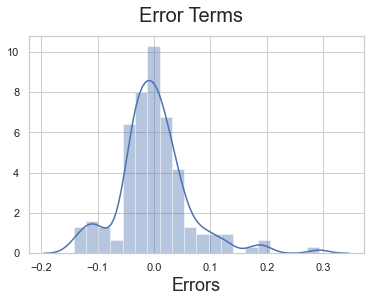

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Predictions

In [93]:
num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [94]:
y_test = df_test.pop('price')
X_test = df_test

In [97]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [103]:
# Making predictions
y_pred = linear_model.predict(X_test_new)
y_pred[:10]

160   0.0687
186   0.1175
59    0.1323
165   0.1418
140   0.0480
64    0.1323
198   0.3546
75    0.3634
172   0.3772
104   0.2671
dtype: float64

In [107]:
#calculate accuracy
r2_score(y_test,y_pred)

0.9126794364569675

In [108]:
res = y_test - y_pred

Text(0.5, 0, 'Errors')

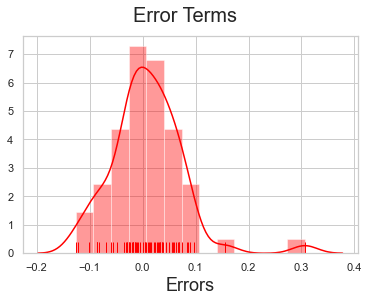

In [110]:
fig = plt.figure()
sns.distplot(res,rug=True,color='red')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Text(0, 0.5, 'y_pred')

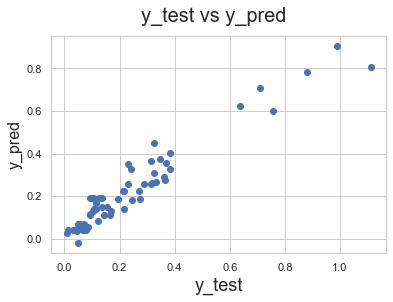

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Conclusion

From the final model we have all our variables in the permissible limits and the model looks to be stable. The error terms are also normally distributed. Overall the model looks good.

Our deciding factors would be -

1. wheelbase	
2. horsepower	
3. cylindernumber_four
4. LuxuryCars
5. carbody_convertible

The final equation of the for our best fitted line for predicting price would be -

**price = (0.3249 x wheelbase) + (0.4945 x horsepower) + (-0.0623 x cylindernumber_four) + (0.2580 x LuxuryCars) + (0.1835 x carbody_convertible) - 0.0163**